## Analyze the shopping trend dataset by answering the questions below.
> **IMPORTANT** write your insights after each question

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the data

In [94]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "shopping_trends_updated.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "iamsouravbanerjee/customer-shopping-trends-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

C:\Users\Elsherbiny\AppData\Local\Temp\ipykernel_1580\2455591562.py:9: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

1. There isn't Null Values 

In [96]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [97]:
df.describe(include="all")

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,2,25,4,NaN,50,4,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,M,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,2652,171,1737,NaN,96,1755,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


1. Most of Customers Are Male
2. Most of Items Pruchased is Blouse
3. Montana is important Location 
4. We must increase Medium Size
5. Most payment method by Paybal

### Question 1
What is the distribution of `Purchase Amount (USD)` for different `Subscription Status` values?
- Plot using both **Seaborn’s `boxplot` and Matplotlib’s histogram**.
- Are there any outliers?

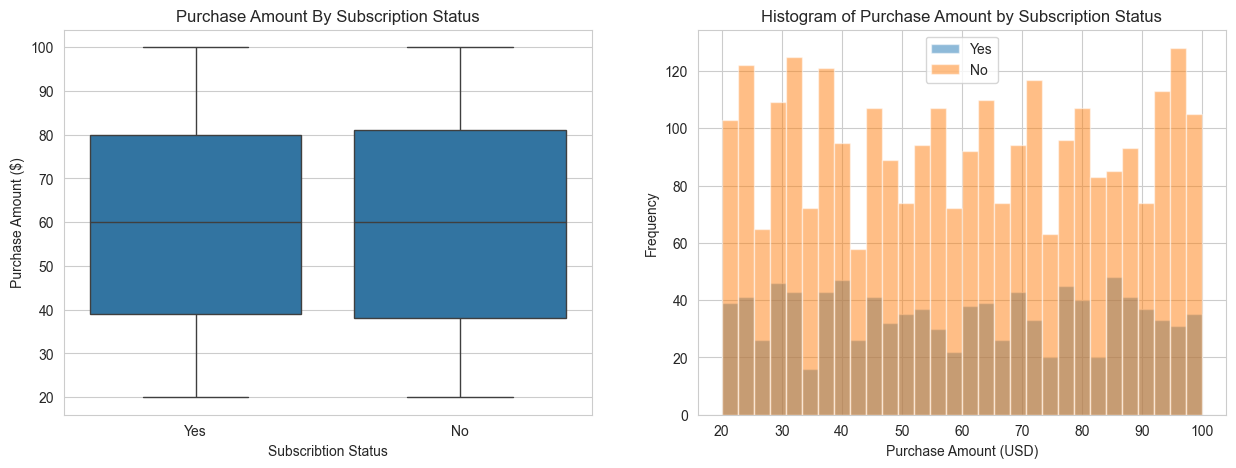

In [98]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
sns.boxplot(y="Purchase Amount (USD)" , x="Subscription Status", data=df)
plt.title("Purchase Amount By Subscription Status")
plt.ylabel("Purchase Amount ($)")
plt.xlabel("Subscribtion Status")


plt.subplot(1,2,2)
subscription_stauts_list = df['Subscription Status'].unique()
for status in subscription_stauts_list:
    plt.hist(
        df[df['Subscription Status'] == status]['Purchase Amount (USD)'],
        bins=30, alpha=0.5, label=status
    )

plt.title("Histogram of Purchase Amount by Subscription Status")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Frequency")
plt.legend()


plt.show()


1. There is no outliers for Purchase Amount even the client have subscribtion or not 
2. Frequency of the clients that have not subscription higher than the client that have subscription
3. So we need to make focus with our client and try to make the clients that have no subscirption to subscripe

### Question 2
Compare the frequency of each `Payment Method` across the dataset **from highest to lowest** .
- Use both **Seaborn's `countplot`** and **Matplotlib's bar plot**.

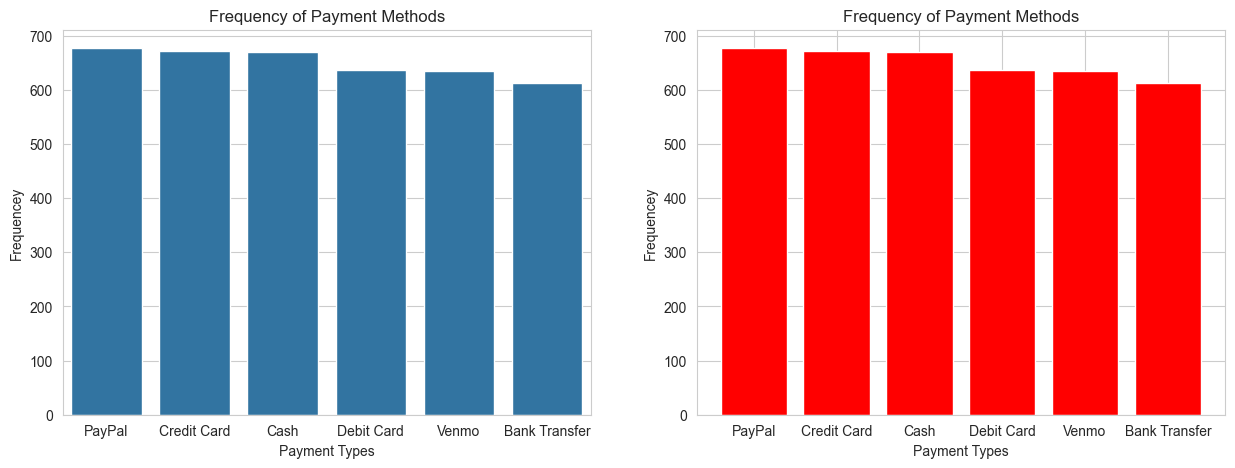

In [99]:
plt.figure(figsize=(15, 5))

# By countplot Using sns
plt.subplot(1,2,1)
descending_order_for_paymentmethod = df["Payment Method"].value_counts().index
sns.countplot(x="Payment Method", order=descending_order_for_paymentmethod, data=df)
plt.title("Frequency of Payment Methods")
plt.xlabel("Payment Types")
plt.ylabel("Frequencey")


# By barplot using plt
plt.subplot(1,2,2)
x = df["Payment Method"].value_counts().index
y = df["Payment Method"].value_counts().values
plt.bar(x=x, height=y, color="red")
plt.title("Frequency of Payment Methods")
plt.xlabel("Payment Types")
plt.ylabel("Frequencey")


plt.show()

1. Most payment Methods is PayPal Then Credit Card Then Cash
2. We can make more facilites for payment online

### Question 3
Show the number of purchases made by each `Gender` in each `Season`.
- Create a **grouped bar chart/ Pie chart using Matplotlib**.
- Also plot a **stacked countplot using Seaborn**.

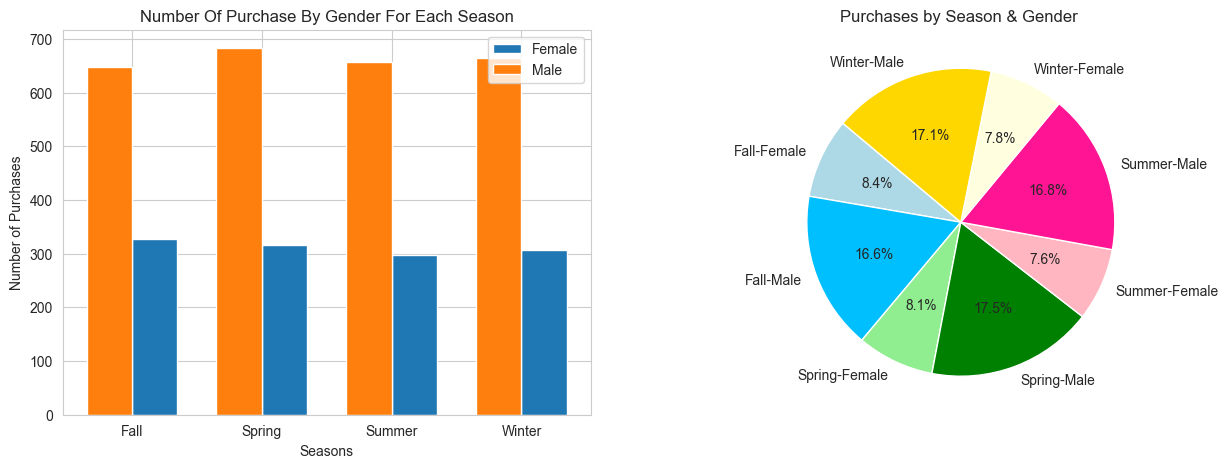

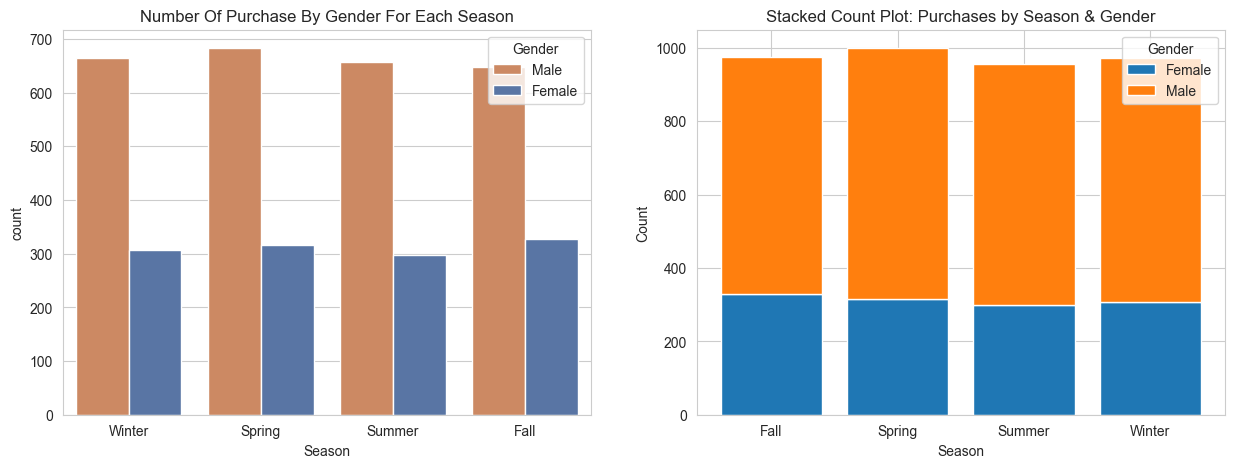

In [100]:
plt.figure(figsize=(15, 5))

#Grouped bar chart by plt
plt.subplot(1,2,1)
grouped = df.groupby(["Season", "Gender"]).size().unstack()
seasons = grouped.index
gender = grouped.columns
bar_width = 0.35
l = np.arange(len(seasons))
#           right
plt.bar(l + bar_width/2, height=grouped[gender[0]], width=bar_width, label=gender[0])
#           left
plt.bar(l - bar_width/2, height=grouped[gender[1]], width=bar_width, label=gender[1])
plt.xticks(l, seasons)
plt.title("Number Of Purchase By Gender For Each Season")
plt.ylabel("Number of Purchases")
plt.xlabel("Seasons")
plt.legend()


# Pie Chart by plt
plt.subplot(1,2,2)
grouped2 = grouped.stack() 
# Labels: Season + Gender
labels = [f"{season}-{gender}" for season, gender in grouped2.index]
sizes = grouped2.values
colors = [
    "lightblue", "deepskyblue",   # Summer (Male/Female)
    "lightgreen", "green",        # Winter (Male/Female)
    "lightpink", "deeppink",      # Spring (Male/Female)
    "lightyellow", "gold"         # Fall (Male/Female)
]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Purchases by Season & Gender ")
plt.show()

##########################################################################################
plt.figure(figsize=(15, 5))

#  CountPlot by sns
plt.subplot(1,2,1)
sns.countplot(data=df, x="Season", hue="Gender", palette=["#DD8452", "#4C72B0"])
plt.title("Number Of Purchase By Gender For Each Season")


# Stacked CountPlot 
plt.subplot(1,2,2)
bottom_vals = [0] * len(grouped) 

for gender in grouped.columns:
    plt.bar(grouped.index, grouped[gender], bottom=bottom_vals, label=gender)
    bottom_vals = bottom_vals + grouped[gender]  # Update stacking base

plt.title("Stacked Count Plot: Purchases by Season & Gender")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Gender")
sns.set_style("whitegrid") 

plt.show()



1. Male Clients are active for purchase for each season 
2. We can provide more products for women and make Marketing for them
3. Spring is the best season we sale

### Question 4
Create a heatmap showing the correlation between all numeric columns.
- Use `sns.heatmap`.
- Interpret the relationship between `Previous Purchases`, `Purchase Amount`, and `Review Rating`.

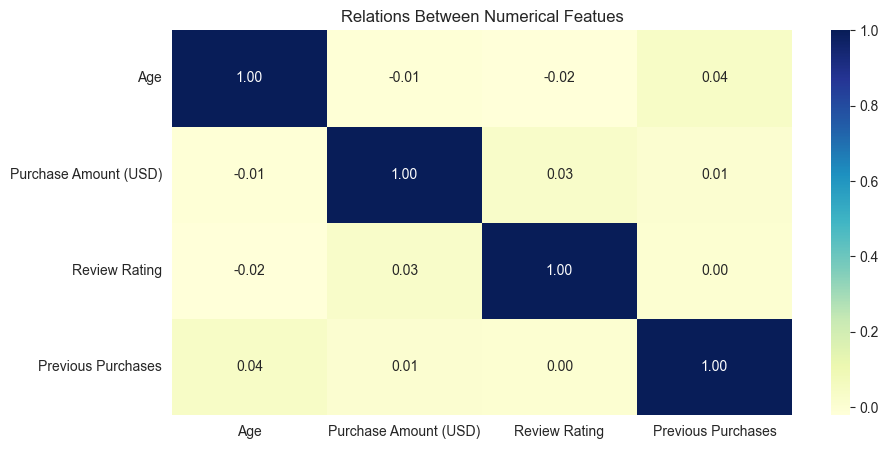

In [101]:
numeric_data = df.select_dtypes(include=["int64", "float64"]).drop("Customer ID", axis=1)
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Relations Between Numerical Featues")
plt.show()

1. There is a very weak relationship between Previous Purchases and the other features (Age, Purchase Amount, Review Rating).

2. All correlation values are below 0.05, indicating that these relationships are not significant.

### Question 5
Create a scatter plot of `Age` vs `Purchase Amount (USD)`, color-coded by `Gender`.
- Use **Matplotlib and Seaborn side-by-side**.
- Add a trend line in Seaborn using `regplot`.

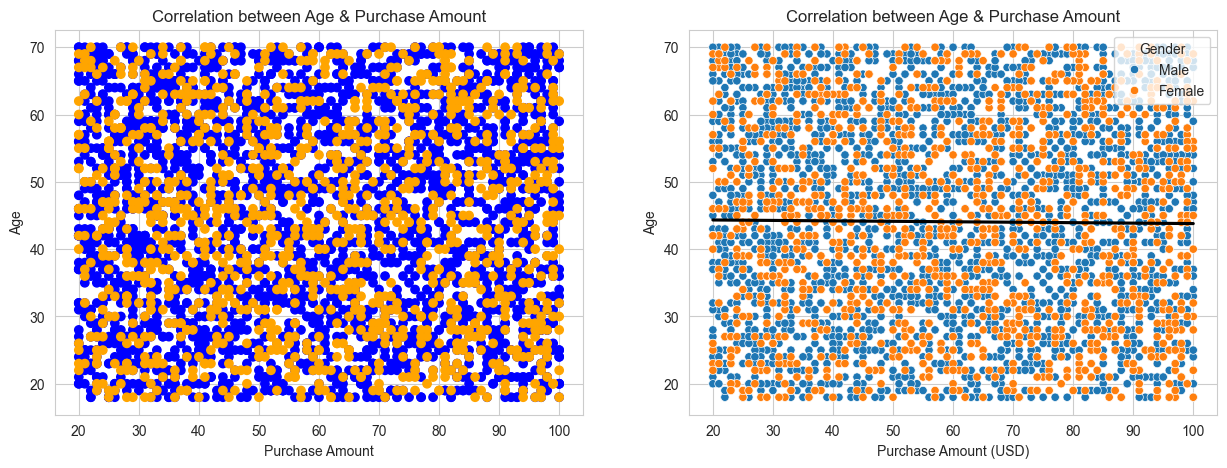

In [102]:
plt.figure(figsize=(15, 5))

# Scatter plot by plt
plt.subplot(1,2,1)
colors = df["Gender"].map({"Male": "blue", "Female": "orange"})
plt.scatter(x=df["Purchase Amount (USD)"], y=df["Age"], color=colors)
plt.title("Correlation between Age & Purchase Amount")
plt.xlabel("Purchase Amount")
plt.ylabel("Age")


# Scatter plot by sns
plt.subplot(1,2,2)
sns.scatterplot(x="Purchase Amount (USD)", y="Age", data=df, hue="Gender")
sns.regplot(data=df, x="Purchase Amount (USD)", y="Age", scatter=False, color="black", ci=None)
plt.title("Correlation between Age & Purchase Amount")

plt.show()

1. There is no relation Or any pattern

### Question 6
How does the average review rating differ across different item `Categories` and `Sizes`?
- Use **Seaborn’s heatmap or pivot heatmap** to visualize.
- Use Pandas pivot table to prepare the data.

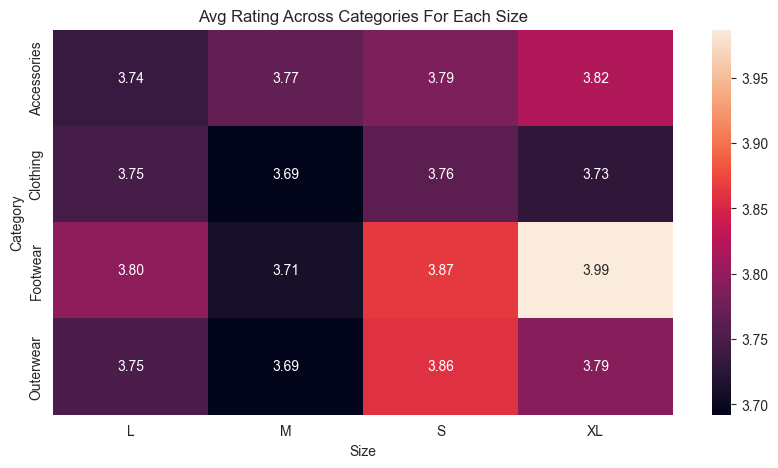

In [103]:
new = df.groupby(["Category", "Size"])["Review Rating"].mean().unstack()
# new2 = df.pivot_table(values="Review Rating", index="Category" ,columns="Size", aggfunc="mean")

plt.figure(figsize=(10,5))
sns.heatmap(new, annot=True, fmt=".2f")
plt.title("Avg Rating Across Categories For Each Size")
plt.show()

1. Actually all categroies by differenct size take good avg rating
2. The best avg rating for Footwear for XL size = 3.99
3. we can focus on M size for different Categories

### Question 7
Which combinations of `Season` and `Shipping Type` lead to the highest average `Purchase Amount (USD)`?
- Show this as a **grouped bar chart** and as a **heatmap**.

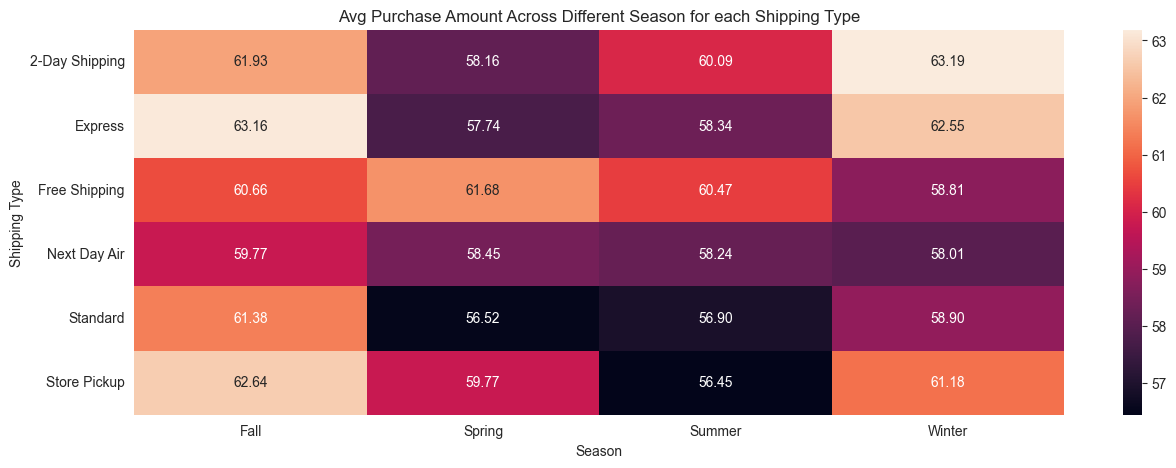

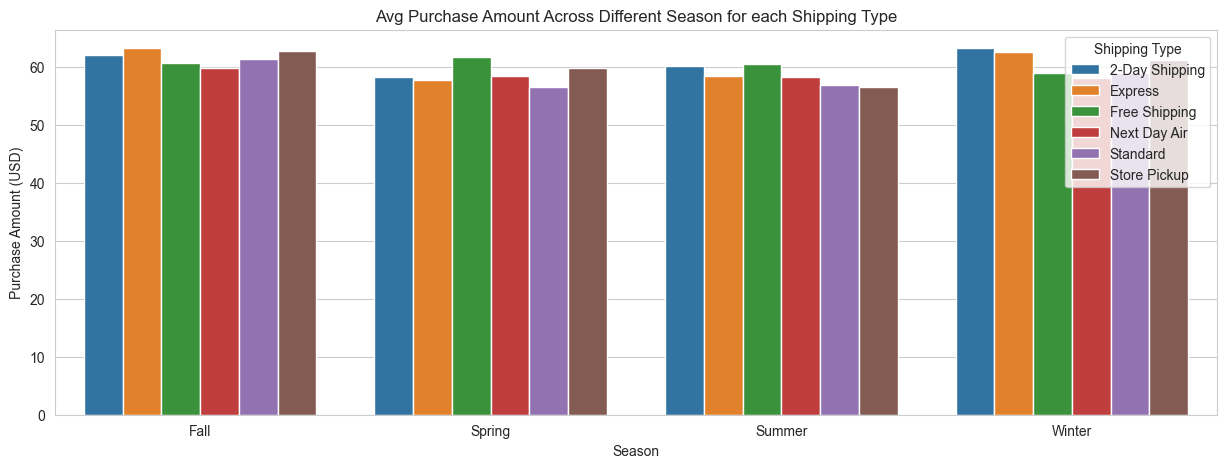

In [104]:
new_grouped = df.groupby(["Shipping Type", "Season"])["Purchase Amount (USD)"].mean()

# heatmap
heatmap_df = new_grouped.unstack()
plt.figure(figsize=(15, 5))
sns.heatmap(heatmap_df, annot=True, fmt=".2f")
plt.title("Avg Purchase Amount Across Different Season for each Shipping Type")
plt.show()

# grouped bar
grouped_bar_df = new_grouped.reset_index()
plt.figure(figsize=(15, 5))
sns.barplot(data=grouped_bar_df,  x="Season", y="Purchase Amount (USD)", hue="Shipping Type")
plt.title("Avg Purchase Amount Across Different Season for each Shipping Type")
plt.show()




1. 2-Day Shipping in Winter (63.19) and Express in Fall (63.16) are the top combinations.
2. Premium/Fast Shipping (2-Day, Express): Consistently higher purchase amounts, suggesting higher-value orders favor   quicker delivery.
3. Focus on premium shipping promotions during Fall and Winter to maximize revenue.
4. Spring/Summer Promotions: Boost sales by pairing free shipping with discounts.

### Question 8
Plot a violin plot of `Review Rating` by `Gender` for each `Subscription Status`.
- Use `sns.violinplot` with `hue`.

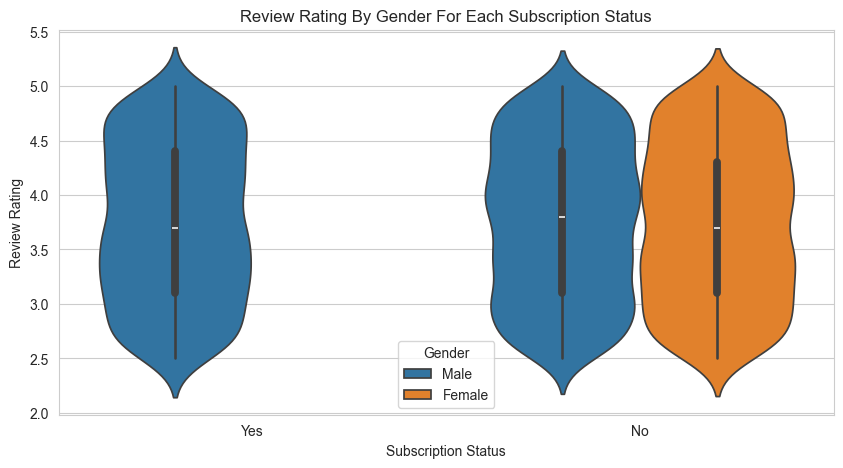

In [105]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df, y="Review Rating", x="Subscription Status", hue="Gender")
plt.title("Review Rating By Gender For Each Subscription Status")
plt.show()

1. There aren't women make subscription so we need to focus with products of women to attract them
2. The most density for rating by men that have subsciption start 2.5 to 5 we can use this is a chance and make more revenu
3. for men that have not subscribtion we can make offers for them to subscribe 

### Question 9
What are the top 5 most purchased `Item Purchased` by total `Purchase Amount`?
- Use Pandas aggregation, plot with **Matplotlib pie and bar** charts.

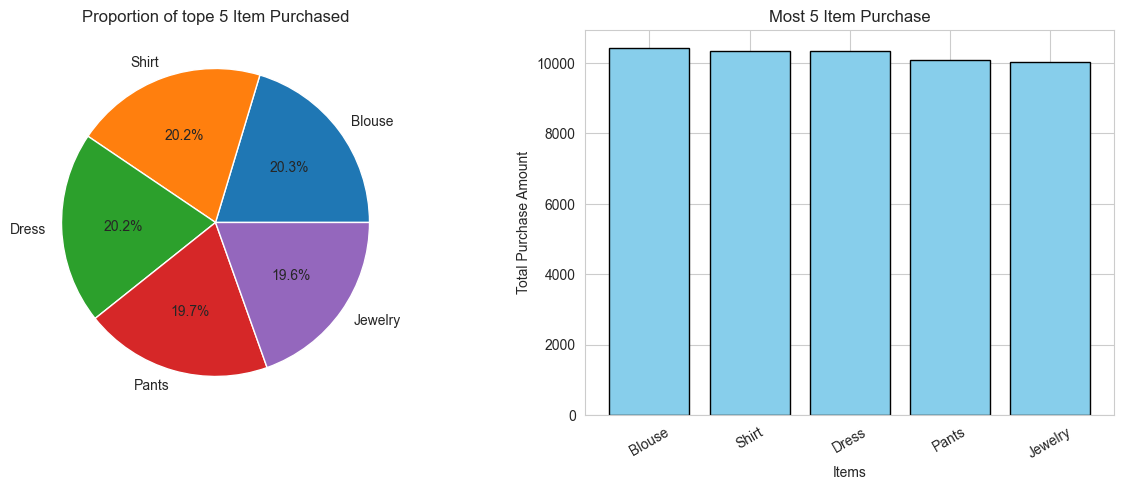

In [106]:
d = df.groupby(["Item Purchased"])["Purchase Amount (USD)"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(15,5))

# Pie Chart
plt.subplot(1,2,1)
pie_labels = d.index
plt.pie(d, autopct='%1.1f%%', labels=pie_labels)
plt.title("Proportion of tope 5 Item Purchased")

# barplot
plt.subplot(1,2,2)
plt.bar(x=d.index , height=d.values, color="skyblue", edgecolor="black")
plt.title("Most 5 Item Purchase")
plt.xlabel("Items")
plt.xticks(rotation=30)
plt.ylabel("Total Purchase Amount")


plt.show()

1. Most Purchase Amount getted by Blouse Item  We can Provide More version from Blouse
2. Most Items Purchase is related with Women Than Men Howerever The Most Customers Are Men

### Question 10
Which `Location` has the highest average `Purchase Amount`, and how does it relate to `Previous Purchases` (plot only top 5 purchase amount location)?
- Use a **Seaborn scatterplot** with size/marker variation.

In [107]:
top5_locations=df.groupby(["Location"])["Purchase Amount (USD)"].mean().sort_values(ascending=False)[:5]
df_top5 = df[df["Location"].isin(top5_locations.index)]

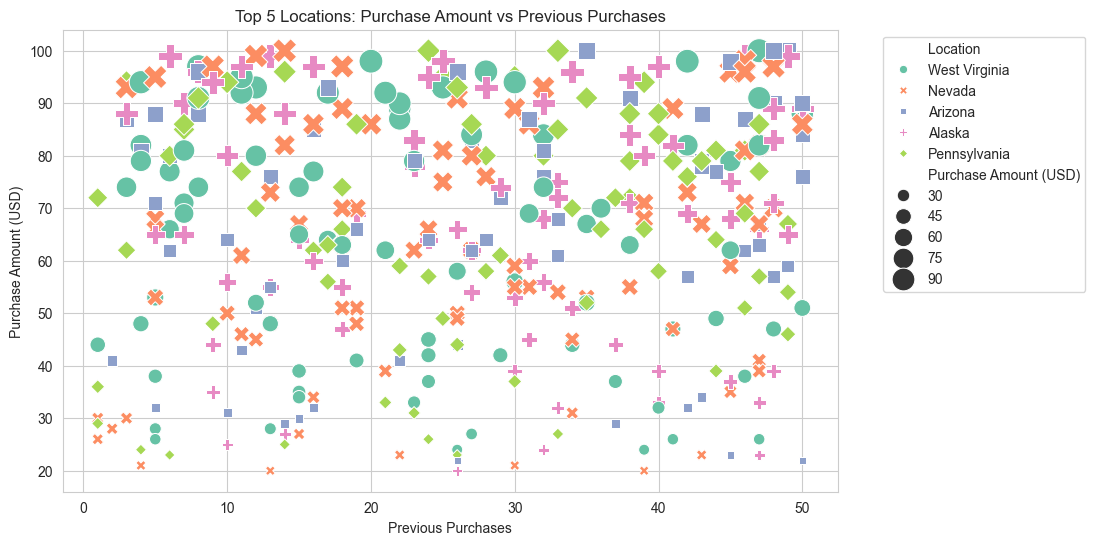

In [108]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_top5,
    x="Previous Purchases",
    y="Purchase Amount (USD)",
    hue="Location",
    size="Purchase Amount (USD)",
    sizes=(50, 300),  
    style="Location",  
    palette="Set2"
)

plt.title("Top 5 Locations: Purchase Amount vs Previous Purchases")
plt.xlabel("Previous Purchases")
plt.ylabel("Purchase Amount (USD)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


1. The most sales Amount In Nevada and West Virginia
2. High purchase amounts happen regardless of previous purchase count (no strong correlation).
3. Nevada and West Virginia appear to have more frequent very high purchase amounts.

### Question 11
Using a crosstab, find how `Gender` and `Size` interact.
- Plot using `sns.heatmap`.

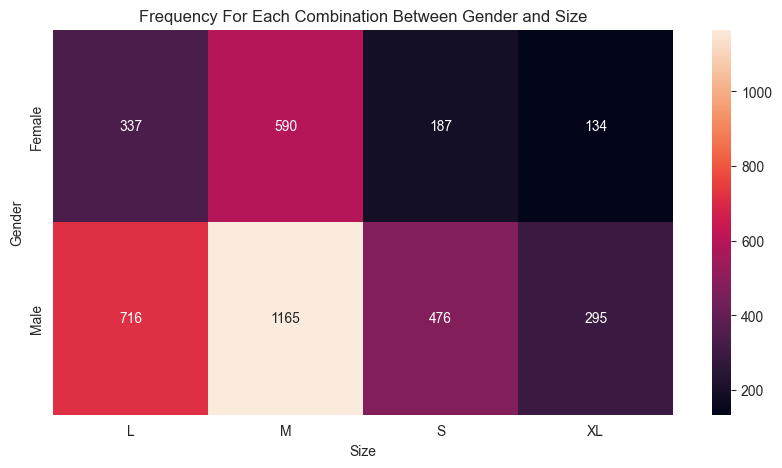

In [109]:
table = pd.crosstab(df["Gender"], df["Size"])
plt.figure(figsize=(10, 5))
sns.heatmap(table, annot=True, fmt='d')
plt.title("Frequency For Each Combination Between Gender and Size")
plt.show()

1. There is 1165 Man buy the clothes with Medium Size
2. More Customers are men so i we can make offer for them and provide more products
3. We need to focus with Women Products

### Question 12
How does the frequency of purchases column influence the use of promo codes?
- Create a **stacked bar chart** using Matplotlib and compare with a **Seaborn countplot**.

In [110]:
# print(pd.crosstab(df["Frequency of Purchases"], df["Promo Code Used"]))
new_data = df.groupby(["Frequency of Purchases", "Promo Code Used"]).size().unstack()


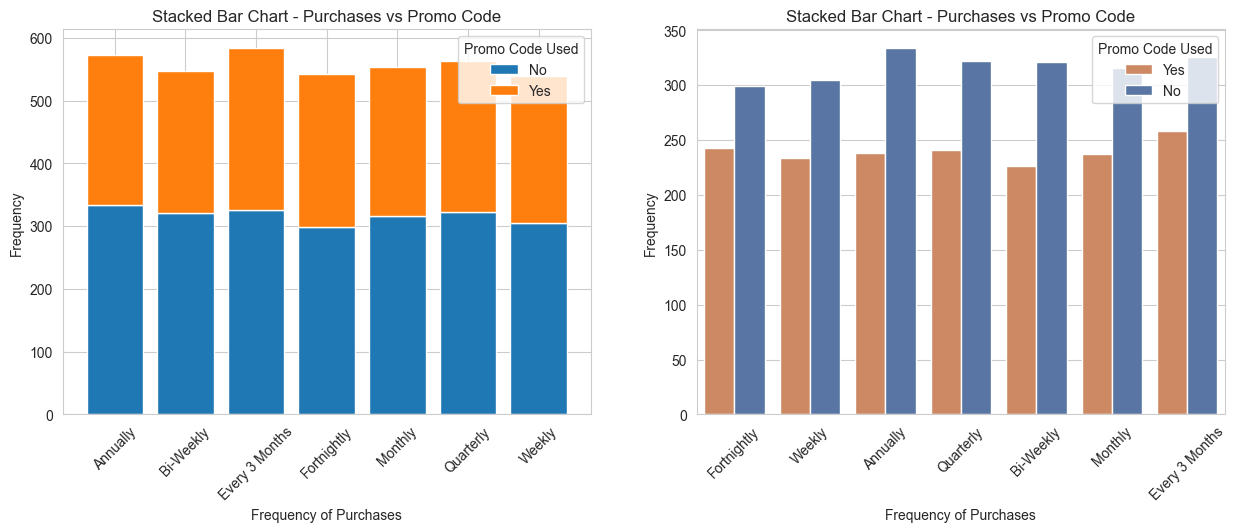

In [111]:
plt.figure(figsize=(15,5))
# stacked bar chart by plt
plt.subplot(1,2,1)

bottom_val = [0] * len(new_data)
for used in new_data.columns:
    plt.bar(new_data.index, height=new_data[used], bottom=bottom_val, label=used)
    bottom_val +=  new_data[used]

plt.xlabel("Frequency of Purchases")
plt.ylabel("Frequency")
plt.title("Stacked Bar Chart - Purchases vs Promo Code")
plt.legend(title="Promo Code Used")
plt.xticks(rotation=45)


# countplot by sns
plt.subplot(1,2,2)
sns.countplot(data=df, x="Frequency of Purchases", hue="Promo Code Used", palette=["#DD8452", "#4C72B0"])
plt.xlabel("Frequency of Purchases")
plt.ylabel("Frequency")
plt.title("Stacked Bar Chart - Purchases vs Promo Code")
plt.legend(title="Promo Code Used")
plt.xticks(rotation=45)

plt.show()


1. Most of Customers don't use the Promo Code
2. The highest Clients who use the Promo Code that Frequency of Purchases For Every 3 Months

### Question 13
Using a pairplot, show pairwise relationships between numeric columns segmented by `Gender`.
- Use `sns.pairplot` with `hue="Gender"`.

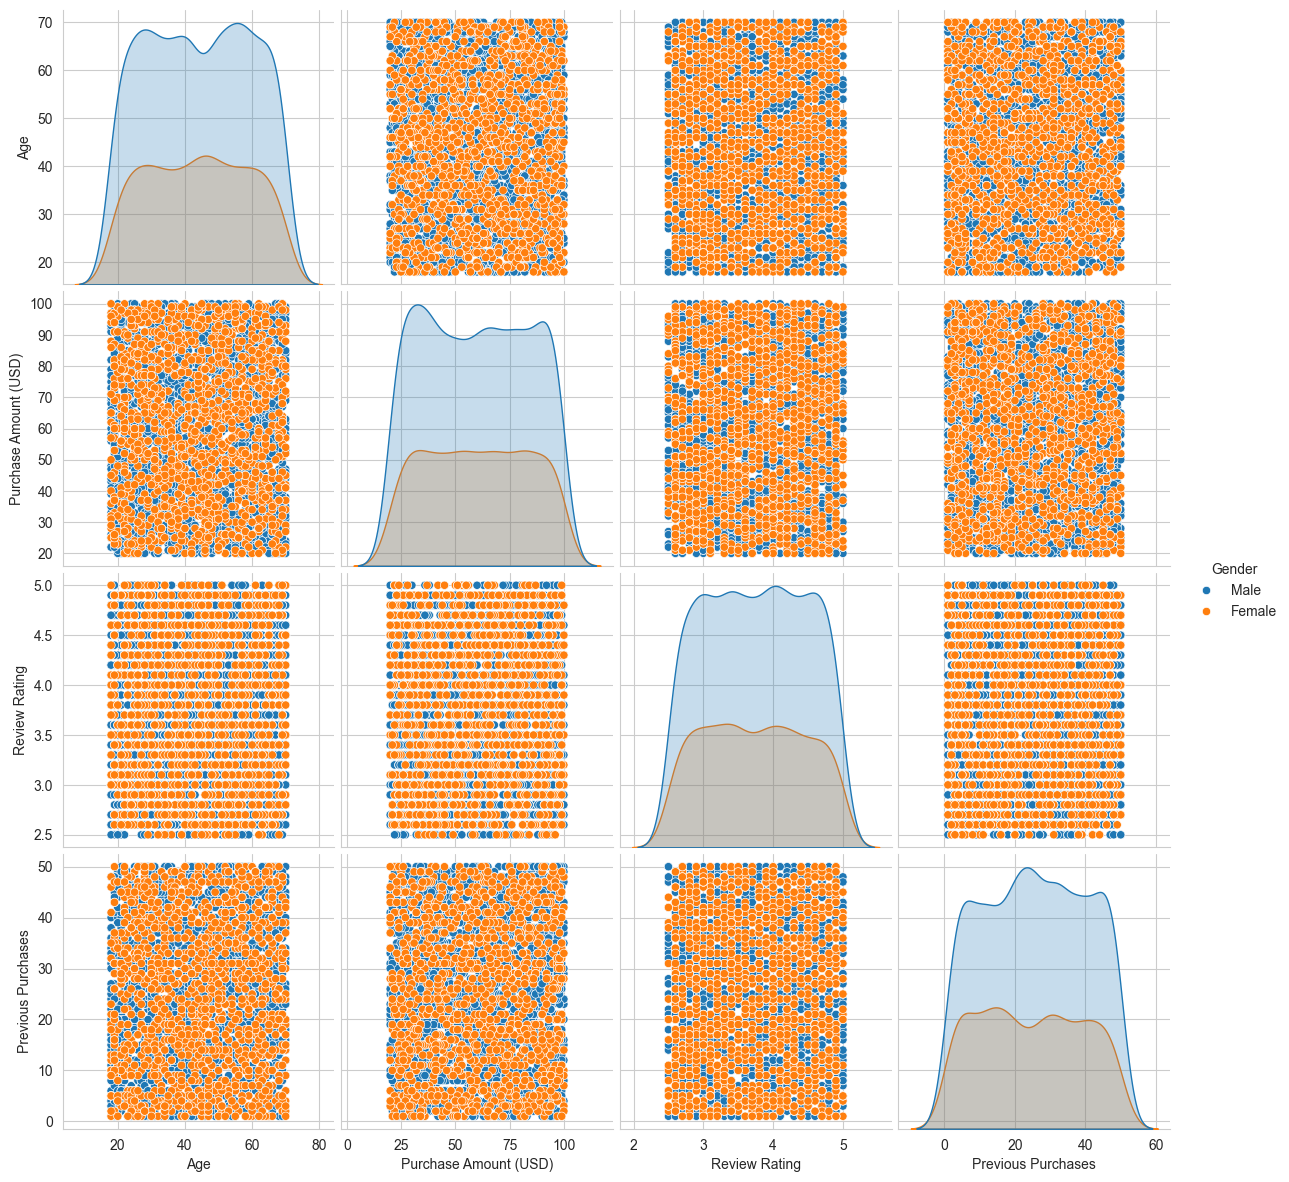

In [112]:
d = df.select_dtypes(include=["int64", "float64"]).drop("Customer ID", axis=1)
d["Gender"] = df["Gender"]  

sns.pairplot(data=d, hue="Gender", height=3)
plt.show()


1. There are no strong correlations among numeric features 
2. Gender does not significantly differentiate numeric variables; both groups overlap heavily.
3.  Most customers:
    - Age: ~25–60
    - Purchase Amount: ~20–100 USD
    - Ratings: ~3–5
    - Previous Purchases: up to ~60

